# Batch VS Stochastic VS Mini Batch  Type Gradient descent Linear Regressor




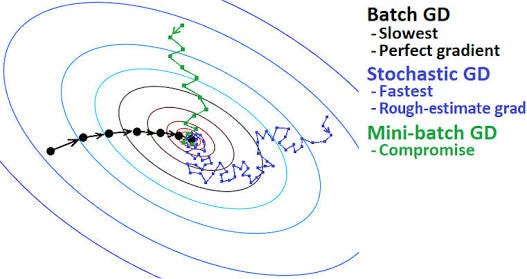

## Mathematical intuition and code from scratch

- **Batch Type Gradient Descent - 1 update update in coeff and intercept  per epochs**
- **Stochastic Gradient descent - n update update in coeff and intercept per epochs (n is the no of rows in given data)**
- **Mini batch gradient descent - (no of rows/ Batch size) update in coeff and intercept per epochs**

In [ ]:
import numpy as np

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression


In [ ]:
#import dataset from sklearn (Diabetes dataframe)
x,y = load_diabetes(return_X_y=True)

In [3]:
x.shape,y.shape

((442, 10), (442,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)

Shape of x_train: (353, 10)
Shape of x_test: (89, 10)


In [8]:
lr= LinearRegression()
lr.fit(x_train,y_train)


print('Coeff_ of Linear regression model is :',lr.coef_)
print('Intercept of Linear regression model is ',lr.intercept_)

Coeff_ of Linear regression model is : [  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
Intercept of Linear regression model is  151.88334520854633


In [10]:
y_pred =lr.predict(x_test)
print("r2_score of linear regression model is :",r2_score(y_test,y_pred))

r2_score of linear regression model is : 0.4399387660024645


In [96]:
# Code from scratch of above Mutiple Linear regression problem (Batch Gradient Descent)

class GDLR:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coeff_ = None
        self.intercept= None
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, x_train, y_train):
        self.intercept= 0
        self.coeff_= np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            # updating intercept 
            # Vectorization
        
            y_hat= np.dot(x_train,self.coeff_)+self.intercept
            der_intercept= -2 * np.mean(y_train-y_hat)
            self.intercept= self.intercept- self.learning_rate*der_intercept
            # updating coeff
            
            der_coeff_= -2* np.dot((y_train-y_hat),x_train)/x_train.shape[0]
            self.coeff_= self.coeff_- self.learning_rate*der_coeff_
    
    def predict(self,x_test):
        return np.dot(x_test,self.coeff_) +self.intercept
    
    

In [177]:
GD= GDLR(epochs=850, learning_rate=0.5)
GD.fit(x_train,y_train)
print('Intercept of created GD class is :', GD.intercept)
print('coeff_ of created GD class is :', GD.coeff_)
y_pred_GD= GD.predict(x_test)
print("r2_score of created GD model is :",r2_score(y_test,y_pred_GD))

Intercept of created GD class is : 152.03769488458954
coeff_ of created GD class is : [  21.07844639 -159.58482955  475.16427669  316.0458939   -32.44589733
 -106.26032022 -193.5463306   108.06085627  432.9129506   105.32246683]
r2_score of created GD model is : 0.45397948687069933


In [104]:
#Self create Stochastic Gradient Descent 

class SDLR:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coeff_ = None
        self.intercept= None
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, x_train, y_train):
        self.intercept= 0
        self.coeff_= np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx= np.random.randint(0,x_train.shape[0])
                # updating intercept

                y_hat= np.dot(x_train[idx],self.coeff_)+self.intercept
                der_intercept= -2 *(y_train[idx]-y_hat)
                self.intercept= self.intercept- self.learning_rate*der_intercept
                # updating coeff

                der_coeff_= -2*np.dot((y_train[idx]-y_hat),x_train[idx])
                self.coeff_= self.coeff_- self.learning_rate*der_coeff_
        
    def predict(self,x_test):
        return np.dot(x_test,self.coeff_) +self.intercept


In [117]:
SD = SDLR(epochs=50,learning_rate=0.01)
SD.fit(x_train,y_train)
print('Intercept of created SD class is :', SD.intercept)
print('coeff_ of created SD class is :', SD.coeff_)

y_pred_SD= SD.predict(x_test)
print("r2_score of created SD model is :",r2_score(y_test,y_pred_GD))

Intercept of created SD class is : 151.78937925851895
coeff_ of created SD class is : [  61.34180067  -72.27602485  360.17611332  253.01091736   14.69207176
  -29.71511206 -172.00773562  125.91742314  314.63279208  133.0519133 ]
r2_score of created SD model is : 0.45397948687069933


In [165]:
#Self create Mini batch Gradient Descent 

class MBGDRegressor:
    
    def __init__(self, batch_size,learning_rate=0.01,epochs=100):
        self.coeff_ = None
        self.intercept= None
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size= batch_size
        
    def fit(self, x_train, y_train):
        self.intercept= 0
        self.coeff_= np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(int(x_train.shape[0]/self.batch_size)):
                idx= random.sample(range(x_train.shape[0]),self.batch_size)
                #updating intercept
                y_hat= np.dot(x_train[idx],self.coeff_)+self.intercept
                der_intercept= -2 *np.mean(y_train[idx]-y_hat)
                self.intercept= self.intercept- self.learning_rate*der_intercept
                #updating coeff_  
                der_coeff_= -2*np.dot((y_train[idx]-y_hat),x_train[idx])
                self.coeff_= self.coeff_- self.learning_rate*der_coeff_
        
    def predict(self,x_test):
        return np.dot(x_test,self.coeff_) +self.intercept


In [171]:
MBGD = MBGDRegressor(epochs=850,learning_rate=0.5,batch_size=int(x_train.shape[0]/10))
MBGD.fit(x_train,y_train)
print('Intercept of created MBGD class is :', MBGD.intercept)
print('coeff_ of created MBGD class is :', MBGD.coeff_)

y_pred_MBGD= MBGD.predict(x_test)
print("r2_score of created SD model is :",r2_score(y_test,y_pred_MBGD))

Intercept of created MBGD class is : 159.0228480679264
coeff_ of created MBGD class is : [  45.29071658 -216.36887937  523.45131755  376.7014732  -878.30141904
  504.82899449  171.03097674   76.4587361   836.38652532   32.70292115]
r2_score of created SD model is : 0.420167516091819


# Conclusion

1. Stochastic Gradient descent converges faster compared to Batch Type Gradient descent and is used in non convex functions .
2. Stochastic Gradient descent requires only one row to update the coeff_ and intercepts whereas in batch 
type gradient descent we require to upload the whole data to update the coeff_ and intercept which create 
hardware issues when we have huge amount of data.
3. Stochastic Gradient descent always provide a random inconsistent type of result as random rows are selected during update the coeff_ and intercept.
4. Batch type gradient descent is used when data is small and consistent result is required. Can be used in convex type functions where no local minima is present.
5. Mini Batch type gradient have both the properties of Batch type and stochatic type gradient.

In [176]:
# Sklearn Stochastic Type gradient Descent

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(eta0=0.01,max_iter=100,learning_rate='constant')

reg.fit(x_train,y_train)
y_pred_Sk_SGD = reg.predict(x_test)
r2_score(y_test,y_pred_Sk_SGD)


0.425151252795294